# D1 - Edge Detection

Implementing edge detection.

## Load image

In [2]:
# Imports
import matplotlib.pyplot as plt
import cv2 
import numpy as np

In [72]:
# Read image and convert to RGB
image = cv2.imread("Resources/D1/IMG_1120.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

libpng warning: iCCP: known incorrect sRGB profile


(3542, 5844, 3)


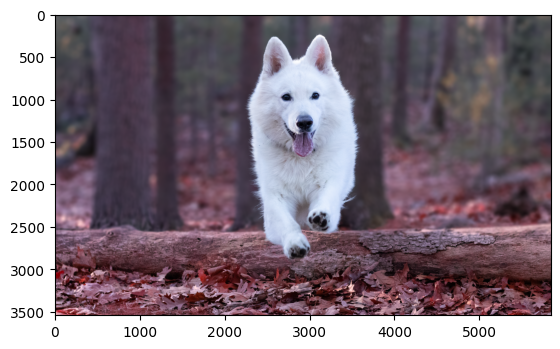

In [73]:
# Preview Image
plt.imshow(image)
plt.show()

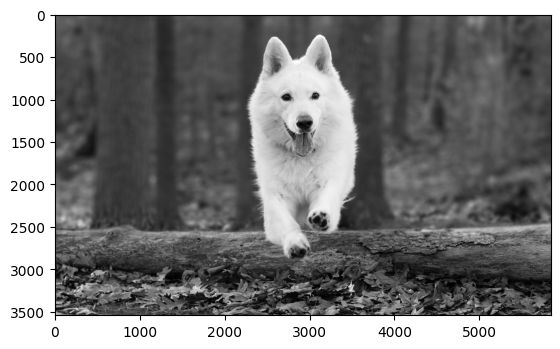

In [74]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")
plt.show()

## Detect edges

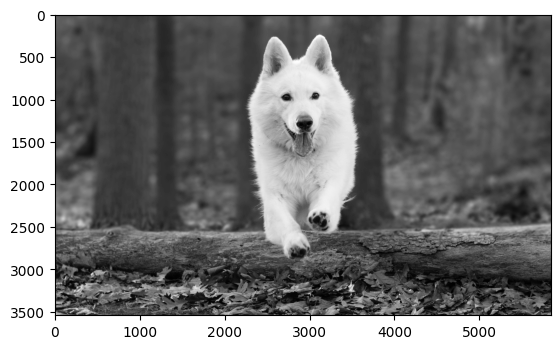

In [75]:
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), sigmaX=1, sigmaY=1)
plt.imshow(blurred_image, cmap="gray")
plt.show()

In [76]:
# Implementation of Sobel
def sobel(image, gradient = "both"):
    
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    
    if gradient == "x":
        gradient = cv2.filter2D(image, -1, sobel_x)
        
    elif gradient == "y":
        gradient = cv2.filter2D(image, -1, sobel_y)
        
    else: 
        gradient_x = cv2.filter2D(image, -1, sobel_x)
        gradient_y = cv2.filter2D(image, -1, sobel_y)
        gradient = gradient_x, gradient_y
        
    return gradient

In [80]:
# Get combined
gradient_x, gradient_y = sobel(blurred_image)
magnitude = cv2.addWeighted(gradient_x, 0.8, gradient_y, 0.8, 0)

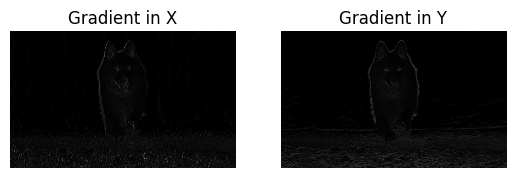

In [83]:
# Plot horizontal
plt.subplot(1, 2, 1)
plt.imshow(np.abs(gradient_x), cmap='gray')
plt.title('Gradient in X')
plt.axis('off')

# Plot vertical
plt.subplot(1, 2, 2)
plt.imshow(np.abs(gradient_y), cmap='gray')
plt.title('Gradient in Y')
plt.axis('off')

plt.show()

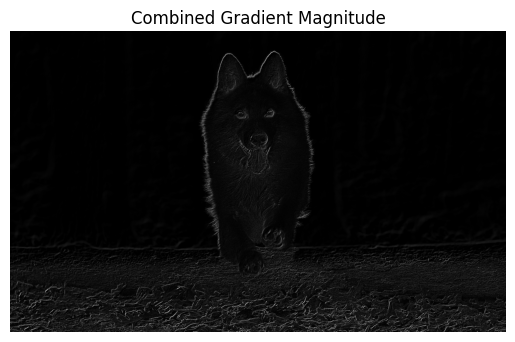

In [82]:
# Plot combined x and y magnitudes
plt.imshow(magnitude, cmap='gray')
plt.title('Combined Gradient Magnitude')
plt.axis('off')
plt.show()